In [ ]:
!pip install --quiet datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-c

In [ ]:
import datasets
from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load train split of emotion dataset
ds = datasets.load_dataset("emotion", split="train")
ds

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
# Shuffle dataset and take the first 20 examples
sample = ds.shuffle(seed=42)[0:20]

# Store texts and their emotion labels as separate lists
texts = sample["text"]
original_labels = sample["label"]

In [ ]:
# Save the texts in a txt file, each text on it own line
with open("annotation_sample.txt", "w") as f:
  for line in texts:
    f.write(f"{line}\n")

In [ ]:
my_labels = []

# Read the file with your own annotations
with open("annotation_sample_labelled.txt", "r") as f:
  annotations = f.readlines()
  for line in annotations:
    # Split each line at your delimiter character. I used ';'
    label = line.split(";")[1]
    # Remove extra spaces and newline characters
    label = label.strip()
    # Append labels to list as integers
    my_labels.append(int(label))

In [ ]:
# Let's see that we got what we expected
my_labels

[1, 1, 0, 0, 2, 4, 3, 0, 0, 1, 0, 0, 1, 1, 4, 3, 1, 2, 0, 0]

In [ ]:
# Calcualate Cohen's Kappa using cohen_kappa_score from sklearn
kappa = cohen_kappa_score(original_labels, my_labels)
print(kappa)

0.21052631578947367


In [ ]:
# Hmmm, not the greatest agreement.
# Let's see where I disagreed with the original labels

# To make inspecting the labels easier, let's use human-readable class names
# The class names are stored in the dataset features
class_names = ds.features["label"].names

# Write a little function to turn the integer labels into class names
def id2label(labels, class_names):
  mapping = {id: label for id, label in enumerate(class_names)}
  out_labels = [mapping[label] for label in labels]
  return out_labels

In [ ]:
original_labels = id2label(original_labels, class_names)
my_labels = id2label(my_labels, class_names)

In [ ]:
#Let's see what our labels look like now
my_labels

['joy',
 'joy',
 'sadness',
 'sadness',
 'love',
 'fear',
 'anger',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'fear',
 'anger',
 'joy',
 'love',
 'sadness',
 'sadness']

In [ ]:
# Let's put our labels into a confusion matrix
cm = confusion_matrix(original_labels, my_labels, labels = class_names)

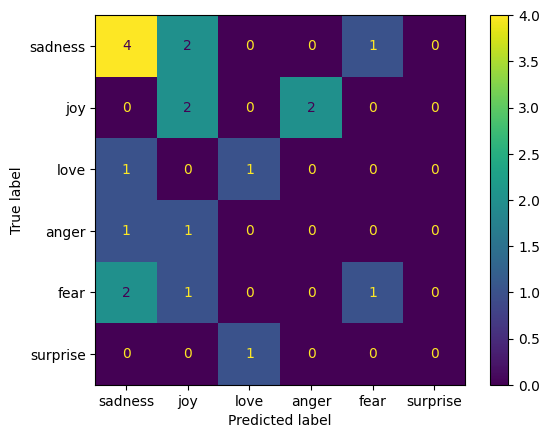

In [ ]:
# Visualise the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()